**Running time and Complexity**

Today we'll be taking first steps to both understanding and formally reasoning about the time our programs take to run.
We will:
1. Trace the computation of code
2. Plot the running time of code
3. Introduce big-O notation

At the end of this series of lectures and labs, I would like you to be able to:
1. Look at a plot of code running time and say what the likely big-O complexity is
2. Predict a plot from a piece of code
3. Determine the big-O complexity of a piece of code
4. Given the big-O complexities of several pieces of code, know how to combine them if the code is combined

We will then use this knowledge to analyse searching and sorting algorithms in the next units.


Let's look at a few simple functions:

In [1]:
def findSum(myList):
    sum = 0
    for element in myList:
        sum = sum + element
    return sum    

def findSumOdd(myList):
    sum = 0
    for element in myList:
        if element % 2 != 0:
          sum = sum + element
    return sum   

def findSumAfter(myList):
    newList = []
    for i in range(len(myList)):
            thisSum = 0
            for j in range(i, len(myList)):
                thisSum = thisSum + myList[j]
            newList.append(thisSum)
    return newList

Let's trace *in enormous detail* how many operations the interpreter does when we call this with (I'll do this on paper in the recording):

In [2]:
findSum([1, 2, 3])
findSumOdd([1, 2, 3])
print(findSumAfter([1, 2, 3]))

[6, 5, 3]


Carefully counting the operations our code needs is one way we can look at how long our code will take to run.  We could do this, but it's likely to be a lot of work.  We will move toward a less-precise version of this in the form of big-O notation.  What we're really interested in is how the time it takes to run our code as the input gets bigger.  

In [3]:
import time

inputLists = []
for i in range(100, 1000, 10):
    inputLists.append([1]*i)
    
for test in inputLists:
    t = time.process_time()
    findSum(test)
    elapsed_time = time.process_time() - t
    print(str(len(test)) + "  " + str(elapsed_time))
    





100  6.999999999979245e-06
110  4.999999999977245e-06
120  1.0000000000010001e-05
130  6.999999999979245e-06
140  4.000000000004e-06
150  5.000000000032756e-06
160  1.2000000000012001e-05
170  4.999999999977245e-06
180  4.999999999977245e-06
190  6.0000000000060005e-06
200  6.0000000000060005e-06
210  8.999999999981245e-06
220  1.0000000000010001e-05
230  1.2999999999985246e-05
240  6.0000000000060005e-06
250  8.000000000008e-06
260  1.4999999999987246e-05
270  1.199999999995649e-05
280  8.000000000008e-06
290  1.2999999999985246e-05
300  8.999999999981245e-06
310  1.2999999999985246e-05
320  1.0000000000010001e-05
330  1.4999999999987246e-05
340  1.4000000000014001e-05
350  1.0000000000010001e-05
360  3.0000000000030003e-05
370  1.599999999996049e-05
380  1.4999999999987246e-05
390  1.4000000000014001e-05
400  1.4000000000014001e-05
410  1.4000000000014001e-05
420  1.6000000000016e-05
430  1.5000000000042757e-05
440  1.6000000000016e-05
450  1.4000000000014001e-05
460  3.9999999999984

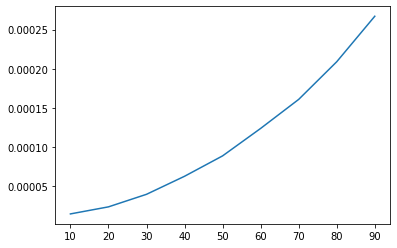

In [36]:


import matplotlib.pyplot as plt

def plotRuntimes(func, listOfInputs):
    times = []
    sizes = []
    for inputItem in listOfInputs:
        sizes.append(len(inputItem))
        t = time.process_time()
        func(inputItem)
        elapsed_time = time.process_time() - t
        times.append(elapsed_time)
    plt.plot(sizes, times)
    plt.show()
    
inputLists = []

for i in range(10, 100, 10):
     inputLists.append([1]*i)

plotRuntimes(findSumAfter, inputLists)

If we want to be more analytical, the idea of big-O notation can help us.  

What is big-O notation?

If f(n) is a function, and n is the size of the input to some code or algorithm, then we say that our code is O(f(n)) if, for a big enough n, the runtime of our code is upper-bounded by k*f(n)

Let's draw some examples on paper:
<I'll draw some examples out on the recording here>

Now, let's talk about some examples:

- O(1)
- O(n)
- O(n<sup>2</sup>)


Let's try to go the other way.  What are the big-O complexities of our functions from before?



In [4]:
def findSum(myList):
    sum = 0
    for element in myList:
        sum = sum + element
    return sum 


def findSumOdd(myList):
    sum = 0
    for element in myList:
        if element % 2 != 0:
          sum = sum + element
    return sum   

def findSumAfter(myList):
    newList = []
    for i in range(len(myList)):
            thisSum = 0
            for j in range(i, len(myList)):
                thisSum = thisSum + myList[j]
            newList.append(thisSum)
    return newList

**Let's talk about how we combine the big-O running times of pieces of code.**

First: because we are talking about *very large inputs (asymptotics)*, we only care about the dominant term.
    
E.g.: if a<b, then O(n<sup>a</sup>) + O(n<sup>b</sup>) gives us O(n<sup>b</sup>)

eg: 
- O(n<sup>2</sup>) + O(n) gives us O(n<sup>2</sup>)
- O(n<sup>4</sup>) + O(n<sup>5</sup>) gives us O(n<sup>5</sup>)

So! What about if we call our various functions in combination?

Do these as an exercise - what is the big-O complexity of each?
- findSum twice
- findSum and then findSumOdd
- findSumOff and then findSumAfter
